In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch

In [2]:
import h5py
Lab1_MNIST = h5py.File('MNISTdata.hdf5','r') # Loading the h5py file
data_in=np.array(Lab1_MNIST['input'])        #converting the file to numpy array (input data)
data_out=np.array(Lab1_MNIST['output'])      #converting the file to numpy array (output data)
print(data_in.shape)
print(data_out.shape)

(2000, 28, 28, 1)
(2000, 1)


In [3]:
# splitting the data into 70 % and 30% testing
train_X,test_X, train_y, test_y = train_test_split(data_in,data_out,test_size=0.3,random_state=21)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(1400, 28, 28, 1)
(600, 28, 28, 1)
(1400, 1)
(600, 1)


In [4]:
#reshaping the input data as (2000,784) and output data as column of 2000
X_train=train_X.reshape(-1,784)
X_test=test_X.reshape(-1,784)
y_train=train_y.reshape(1400)
y_test=test_y.reshape(600)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 784)
(600, 784)
(1400,)
(600,)


In [5]:
# coverting numpy array to tensor and datatype float(for input) and integer for output
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([1400, 784])
torch.Size([600, 784])
torch.Size([1400])
torch.Size([600])


In [6]:
#zipping the input data X and labels y together for test data and train data separately
train_data= list(zip(X_train,y_train))
test_data = list(zip(X_test,y_test))

In [7]:
# Loading data in batches of 64 size and checking it using for loop

trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
testloader = DataLoader(test_data,batch_size=64, shuffle=False)
for images, labels in trainloader:
    print('Batch shape:', images.size())
    break
for i in trainloader:
    print(i)

Batch shape: torch.Size([64, 784])
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([0, 4, 5, 3, 2, 6, 3, 2, 0, 5, 4, 5, 1, 0, 6, 7, 6, 7, 1, 6, 0, 0, 9, 8,
        8, 7, 8, 1, 4, 7, 8, 4, 4, 9, 9, 2, 0, 9, 8, 6, 9, 1, 2, 9, 2, 2, 1, 1,
        2, 1, 2, 4, 4, 9, 7, 5, 6, 3, 6, 2, 8, 7, 3, 7])]
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([8, 1, 6, 5, 3, 3, 6, 1, 9, 2, 4, 5, 9, 4, 0, 0, 1, 4, 9, 7, 1, 1, 1, 3,
        2, 5, 8, 7, 1, 3, 2, 7, 2, 6, 9, 4, 6, 1, 4, 8, 8, 6, 2, 8, 2, 2, 8, 3,
        8, 9, 5, 9, 4, 9, 4, 5, 9, 0, 7, 6, 2, 3, 1, 7])]
[tensor([[0., 0.,

In [8]:
# Creating a model class
class Model_1(nn.Module):
    def __init__(self,in_features=784,h1 = 50, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)  # input layer to hidden layer
        self.out = nn.Linear(h1,out_features) # hidden layer to output layer 
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = self.out(x)
        return F.log_softmax(x,dim=1)
torch.manual_seed(4)
model_1 = Model_1()
model_1

Model_1(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=10, bias=True)
)

In [9]:
# Showing number of parameters
for item in model_1.parameters():
    print(item.numel())

39200
50
500
10


In [10]:
# Setting up loss function and optimizer function
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),lr=1e-4,weight_decay=1e-5)

In [11]:
# Training the model with 100 epochs
import time
start_time = time.time()
epoch=100
trn_loss1=[]
tst_loss1=[]
tst_corr = []
trn_corr = []
for i in range(epoch):
    num_tst_corr = 0
    num_trn_corr = 0
    for b,(X_tr,y_tr) in enumerate(trainloader):
        b+=1
        y_predicted = model_1(X_tr)
        trnl_1=loss(y_predicted,y_tr)
        
        predicted = torch.max(y_predicted.data, 1)[1]    # this calculates the index of maximum value in one hot vector
        batch_corr = (predicted == y_tr).sum()   # this compares target value with model prediction
        num_trn_corr += batch_corr                  # summing up number of correct predictions by the model
        
        optimizer.zero_grad()
        trnl_1.backward()
        optimizer.step()
    
    trn_loss1.append(trnl_1.item())    
    if i%10==0:
        print(f' epoch: {i+1}     train_loss: {trnl_1.item()}')
    
    trn_corr.append(num_trn_corr)
    
    # Cecking the model for the test data (this part is not the par tof backward computation so without gradient)
    with torch.no_grad():
        for c,(X_tst,y_tst) in enumerate(testloader):
            c+=1
            y_val = model_1(X_tst)
            tstl_1=loss(y_val,y_tst)
            
            pred = torch.max(y_val.data, 1)[1]
            batch_corr_test = (pred == y_tst).sum()
            num_tst_corr += batch_corr_test
            
        tst_loss1.append(tstl_1.item())
        if i%10==0:
            print(f' epoch: {i+1}     test_loss: {tstl_1.item()}')
    tst_corr.append(num_tst_corr)
    
end_time = time.time()
total_time = end_time - start_time
print(f'total time: {total_time}')

 epoch: 1     train_loss: 2.381706714630127
 epoch: 1     test_loss: 2.2911956310272217
 epoch: 11     train_loss: 1.572196364402771
 epoch: 11     test_loss: 1.7136238813400269
 epoch: 21     train_loss: 1.2102547883987427
 epoch: 21     test_loss: 1.4824858903884888
 epoch: 31     train_loss: 1.180069088935852
 epoch: 31     test_loss: 1.3090816736221313
 epoch: 41     train_loss: 1.0072696208953857
 epoch: 41     test_loss: 1.1541996002197266
 epoch: 51     train_loss: 0.6899691820144653
 epoch: 51     test_loss: 1.0101276636123657
 epoch: 61     train_loss: 0.7686343789100647
 epoch: 61     test_loss: 0.9149834513664246
 epoch: 71     train_loss: 0.6369858980178833
 epoch: 71     test_loss: 0.86186283826828
 epoch: 81     train_loss: 0.5176295042037964
 epoch: 81     test_loss: 0.7907021641731262
 epoch: 91     train_loss: 0.4864971935749054
 epoch: 91     test_loss: 0.7671825289726257
total time: 11.469417810440063


Text(0.5, 1.0, 'EPochs vs Loss')

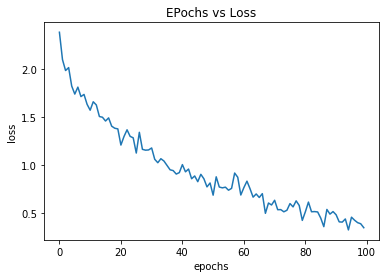

In [12]:
# PLotting the training loss vs epochs
plt.plot(range(epoch),trn_loss1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("EPochs vs Loss")

Text(0.5, 1.0, 'EPochs vs Loss')

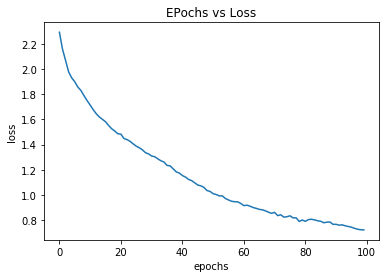

In [13]:
# Plotting the test loss vs epochs
plt.plot(range(epoch),tst_loss1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("EPochs vs Loss")

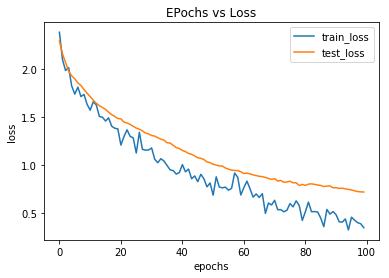

In [14]:
# Comparing the training loss and test loss
plt.plot(range(epoch),trn_loss1,label='train_loss')
plt.plot(range(epoch),tst_loss1,label='test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("EPochs vs Loss")
plt.legend()

In [15]:
# Accuracy of 1400 training data over each epoch in percentage
l_trn_accurate=[]
for i in trn_corr:
    l_trn_accurate.append(float(f'{i.item()/14:.2f}'))
print(l_trn_accurate)

[14.07, 25.79, 36.71, 45.86, 51.29, 54.36, 57.93, 59.43, 62.86, 63.93, 66.57, 69.43, 71.43, 73.0, 74.21, 75.93, 77.07, 77.64, 79.07, 80.43, 81.5, 82.93, 83.43, 83.86, 84.36, 85.21, 86.0, 86.71, 86.86, 87.64, 87.79, 88.36, 88.57, 88.93, 89.07, 89.57, 90.36, 90.5, 90.93, 91.29, 91.43, 91.64, 91.71, 92.0, 92.07, 92.36, 92.36, 92.79, 92.71, 92.79, 93.21, 93.21, 93.21, 93.21, 93.57, 93.36, 93.57, 93.86, 93.79, 93.93, 94.07, 94.21, 94.36, 94.36, 94.36, 94.57, 94.71, 94.64, 94.79, 95.0, 95.14, 95.0, 94.93, 95.07, 95.07, 95.14, 95.29, 95.43, 95.57, 95.5, 95.71, 95.64, 95.79, 95.86, 95.86, 95.86, 95.86, 95.86, 95.93, 95.93, 95.86, 96.0, 96.0, 95.93, 96.0, 96.14, 96.07, 96.29, 96.21, 96.07]


In [16]:
# Number of correct predictions out of 600 test data over each epoch
l_tst_accurate=[]
for i in tst_corr:
    l_tst_accurate.append(float(f'{i.item()/6:.2f}'))
print(l_tst_accurate)

[21.83, 29.83, 39.5, 45.67, 49.5, 52.33, 54.33, 56.0, 58.33, 60.17, 61.5, 62.33, 63.0, 65.17, 66.17, 66.83, 67.67, 69.33, 69.5, 71.17, 72.33, 72.33, 73.17, 73.33, 73.5, 75.5, 75.5, 76.5, 76.5, 76.5, 77.67, 77.5, 78.5, 78.0, 78.33, 78.0, 79.0, 79.33, 78.67, 78.5, 78.67, 79.17, 79.0, 79.0, 79.33, 80.0, 79.5, 79.83, 80.67, 80.67, 80.17, 81.0, 80.17, 81.0, 81.17, 80.83, 80.67, 80.67, 81.33, 81.67, 81.67, 81.5, 81.33, 81.17, 81.83, 82.17, 81.83, 82.0, 82.0, 81.33, 82.0, 81.5, 81.17, 81.33, 81.17, 81.17, 80.83, 81.33, 81.5, 81.67, 81.83, 81.17, 81.67, 81.33, 81.67, 81.5, 81.33, 81.17, 81.17, 81.17, 81.17, 81.5, 82.17, 81.83, 81.67, 81.17, 81.83, 82.17, 82.5, 82.5]


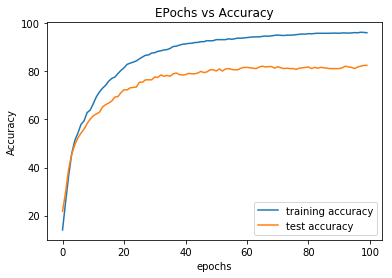

In [17]:
# Comparing the training accuracy and test accuracy
plt.plot(range(epoch),(l_trn_accurate),label='training accuracy')
plt.plot(range(epoch),(l_tst_accurate),label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title("EPochs vs Accuracy")
plt.legend()

In [18]:
for i,j in enumerate(range(5)):
    model_1.eval()
    with torch.no_grad():
        new_pred = model_1(test_data[i][0].view(-1,784)).argmax()
        if new_pred != test_data[i][1]:
            print(f"{i+1}.) Predicted value: {new_pred.item()}      Actual label:{test_data[i][1]}     Incorrect prediction" )
        else:
            print(f"{i+1}.) Predicted value: {new_pred.item()}      Actual label:{test_data[i][1]}     Correct prediction" )

1.) Predicted value: 4      Actual label:4     Correct prediction
2.) Predicted value: 1      Actual label:1     Correct prediction
3.) Predicted value: 3      Actual label:3     Correct prediction
4.) Predicted value: 4      Actual label:4     Correct prediction
5.) Predicted value: 6      Actual label:6     Correct prediction
